## Regression - NYC & Boston Housing
Katie Corcoran

In [203]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

randomstate = 1000

### Linear Regression - NYC

In [204]:
df = pd.read_csv('nyc-rolling-sales_clean.csv')
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BUILDING CLASS AT PRESENT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,sale_year,sale_month
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23,2016,9
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,C4,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23,2016,9
2,Manhattan,ALPHABET CITY,14 RENTALS - 4-10 UNIT,2A,S3,10009,3,1,4,1520.0,3360.0,1910,2,S3,3300000.0,2016-11-15,2016,11
3,Manhattan,ALPHABET CITY,22 STORE BUILDINGS,4,K4,10009,0,1,1,1218.0,3586.0,1899,4,K4,3700000.0,2016-09-28,2016,9
4,Manhattan,CHELSEA,07 RENTALS - WALKUP APARTMENTS,2B,C4,10011,9,0,9,1566.0,6330.0,1901,2,C4,1583840.0,2017-08-31,2017,8


In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   BOROUGH                         30236 non-null  object 
 1   NEIGHBORHOOD                    30236 non-null  object 
 2   BUILDING CLASS CATEGORY         30236 non-null  object 
 3   TAX CLASS AT PRESENT            30236 non-null  object 
 4   BUILDING CLASS AT PRESENT       30236 non-null  object 
 5   ZIP CODE                        30236 non-null  int64  
 6   RESIDENTIAL UNITS               30236 non-null  int64  
 7   COMMERCIAL UNITS                30236 non-null  int64  
 8   TOTAL UNITS                     30236 non-null  int64  
 9   LAND SQUARE FEET                30236 non-null  float64
 10  GROSS SQUARE FEET               30236 non-null  float64
 11  YEAR BUILT                      30236 non-null  int64  
 12  TAX CLASS AT TIME OF SALE       

#### 1. Feature Variable Types

In [206]:
numerics = ["RESIDENTIAL UNITS", "COMMERCIAL UNITS", "TOTAL UNITS", "LAND SQUARE FEET", "GROSS SQUARE FEET"]
categoricals = ["BOROUGH", "NEIGHBORHOOD", "BUILDING CLASS CATEGORY", "TAX CLASS AT PRESENT", "BUILDING CLASS AT PRESENT",
                "ZIP CODE", "YEAR BUILT", "TAX CLASS AT TIME OF SALE", "BUILDING CLASS AT TIME OF SALE", 'sale_year', 'sale_month']

df[numerics]= df[numerics].apply(lambda x: pd.to_numeric(x, errors="coerce"))
df[categoricals]= df[categoricals].apply(lambda x: x.astype("category"))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30236 entries, 0 to 30235
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         30236 non-null  category
 1   NEIGHBORHOOD                    30236 non-null  category
 2   BUILDING CLASS CATEGORY         30236 non-null  category
 3   TAX CLASS AT PRESENT            30236 non-null  category
 4   BUILDING CLASS AT PRESENT       30236 non-null  category
 5   ZIP CODE                        30236 non-null  category
 6   RESIDENTIAL UNITS               30236 non-null  int64   
 7   COMMERCIAL UNITS                30236 non-null  int64   
 8   TOTAL UNITS                     30236 non-null  int64   
 9   LAND SQUARE FEET                30236 non-null  float64 
 10  GROSS SQUARE FEET               30236 non-null  float64 
 11  YEAR BUILT                      30236 non-null  category
 12  TAX CLASS AT TIME 

#### 2. Target Variable

In [207]:
target = np.log(df['SALE PRICE'])

We don't need to keep SALE PRICE in the dataset because we don't want to use it in the feature space. If we kept it in the feature space, the model would find a direct relationship between log SALE PRICE and SALE PRICE, which would make predictions far too easy and would be "cheating," because we're giving the model the answer in the feature space. This would also lead to poor model generalization, because the model would fail to predict on new data when the SALE PRICE isn't known.

#### 3. Feature Space

In [208]:
X = df.drop(['SALE PRICE', 'SALE DATE'], axis=1, inplace=False)

#### 4. Dummy Variables

In [209]:
X = pd.get_dummies(X, drop_first=True, dtype=int)
X
# There are a lot more feature variables now that they've been split out into dummy variables!

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,NEIGHBORHOOD_ALPHABET CITY,...,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
0,10,0,10,2272.0,6794.0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,8,0,8,1750.0,4226.0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,3,1,4,1520.0,3360.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,1218.0,3586.0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,9,0,9,1566.0,6330.0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30231,2,0,2,11088.0,2160.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30232,2,0,2,2400.0,2575.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
30233,2,0,2,2498.0,2377.0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
30234,2,0,2,4000.0,1496.0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


#### 5. Split into Train and Test

In [210]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3, random_state=randomstate)
X_train.head()

,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BOROUGH_Brooklyn,BOROUGH_Manhattan,BOROUGH_Queens,BOROUGH_Staten Island,NEIGHBORHOOD_ALPHABET CITY,...,sale_month_3,sale_month_4,sale_month_5,sale_month_6,sale_month_7,sale_month_8,sale_month_9,sale_month_10,sale_month_11,sale_month_12
27919,1,0,1,4000.0,1105.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
26034,1,0,1,3918.0,1700.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
27154,2,0,2,4000.0,2012.0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
13684,2,0,2,2003.0,2532.0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
28389,1,0,1,2938.0,1632.0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


#### 6. Train the Model

1. Predicted values

In [211]:
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_hat_test = reg_model.predict(X_test)
y_hat_test

array([13.67535658, 13.10232231, 13.19926016, ..., 13.74255648,
       13.49516621, 13.02927222])

2. log_predictions

In [212]:
log_predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
log_predictions.head()

,y_test,y_hat_test,resid
3767,14.077875,13.675357,0.402518
24270,13.199324,13.102322,0.097002
27718,13.384728,13.199260,0.185467
6232,12.873902,13.139877,-0.265975
11161,13.710150,13.911801,-0.201651


3. Get RMSE_test

In [213]:
MSE_test = np.mean(np.square(log_predictions['resid']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

0.529

#### 7. K-Fold Cross Validation

In [214]:
from sklearn.model_selection import cross_val_score

5-fold

In [215]:
MSE_5 = -cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")
RMSE_CV5 = np.mean(np.sqrt(MSE_5))
np.round(RMSE_CV5,3)

0.897

10-fold

In [216]:
MSE_10 = -cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=10, scoring="neg_mean_squared_error")
RMSE_CV10 = np.mean(np.sqrt(MSE_10))
np.round(RMSE_CV10,3)

0.834

#### 8.
RMSE_test is better than both RMSE_CV5 and RMSE_CV10, which indicates that the model is performing better on the test set compared to the cross-validation results. This tells us that the model struggled to generalize during cross-validation, which could be a sign of overfitting. Additionally, the model performed better with 10 folds than it did with 5 folds.

### Polynomial Regression - Boston

In [217]:
df_poly = pd.read_csv('boston_polynomial.csv')
df_poly.head()

,price,LSTAT
0,24.0,4.98
1,21.6,9.14
2,34.7,4.03
3,33.4,2.94
4,36.2,5.33


#### 1. Scatter Plot

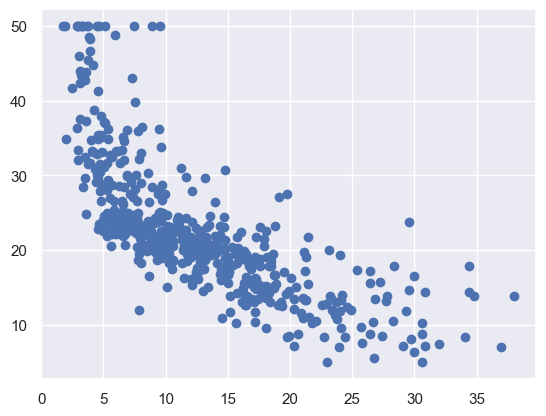

In [218]:
x = np.array(df_poly['LSTAT'])
y = np.array(df_poly['price'])
plt.scatter(x,y)
plt.show()

#### 2. Set polynomial features

In [219]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=5)
X_poly= pd.DataFrame(poly.fit_transform(x.reshape(-1,1)))
X_poly.head()

,0,1,2,3,4,5
0,1.0,4.98,24.8004,123.505992,615.059840,3062.998004
1,1.0,9.14,83.5396,763.551944,6978.864768,63786.823981
2,1.0,4.03,16.2409,65.450827,263.766833,1062.980336
3,1.0,2.94,8.6436,25.412184,74.711821,219.652754
4,1.0,5.33,28.4089,151.419437,807.065599,4301.659644


#### 3. Split into train and test

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=randomstate)

#### 4. Train the model

1. Save predicted values

In [221]:
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)
y_hat_test = poly_model.predict(X_test)
y_hat_test

array([21.51413208, 18.1501911 , 16.19795578, 40.76590135, 22.37305198,
       31.89964159, 12.91667857, 41.06228586, 18.88430586, 19.23549384,
       27.25467888, 19.3740062 , 27.08637008, 12.86518058, 21.48821792,
       25.39810683, 18.92467373, 16.00042239, 17.82745642, 29.67132276,
       34.03247849, 24.76167384, 36.52915802, 16.86220648, 19.08011108,
       17.64733717, 18.94772432, 18.08991313, 19.79639639, 16.37415325,
       34.24536967, 33.32868833, 18.45945504, 29.33664895, 14.59680141,
       24.57424041, 20.7888481 , 38.46540109, 38.62609315, 18.6700366 ,
       18.34129347, 45.18170784, 12.3014189 , 19.71898451, 20.06416547,
       33.86411196, 30.87232506, 16.59615658, 19.91688897, 26.57821142,
       18.75711647, 20.96557049, 18.54164533, 15.10576723, 21.48821792,
       19.84437556, 23.27837238, 15.26889373, 17.82128781, 19.63041075,
       17.23436286, 24.97286332, 28.04045773, 12.11557904, 28.20044073,
       26.46699883, 18.93043743, 20.31787476, 31.04388815, 15.75

2. Data frame predictions 

In [222]:
predictions = pd.DataFrame({'y_test':y_test, 'y_hat_test':y_hat_test, 'resid': y_test - y_hat_test})
predictions.head()

,y_test,y_hat_test,resid
0,21.8,21.514132,0.285868
1,10.2,18.150191,-7.950191
2,15.2,16.197956,-0.997956
3,43.5,40.765901,2.734099
4,50.0,22.373052,27.626948


3. RMSE_test

In [223]:
MSE_test = np.mean(np.square(predictions['resid']))
RMSE_test = np.sqrt(MSE_test)
np.round(RMSE_test,3)

5.204

#### 5. K-Fold Cross Validation

In [224]:
MSE_5 = -cross_val_score(estimator=LinearRegression(), X=X_train, y=y_train, cv=5, scoring="neg_mean_squared_error")
RMSE_CV5 = np.mean(np.sqrt(MSE_5))
np.round(RMSE_CV5,3)

5.262

#### 6.

In [225]:
def my_polynomial_regression(poly_degree, X, y, test_size=0.3, rand_state=1000):

    poly_features= PolynomialFeatures(degree=poly_degree)

    # transforms the existing features to higher degree features.
    X_poly = pd.DataFrame(poly_features.fit_transform(X.reshape(-1,1)))

    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=test_size, random_state=rand_state)

    # fit the transformed features to Linear Regression
    poly_model = LinearRegression()
    poly_model.fit(X_train, y_train)

    # predicting on training data-set
    y_train_predicted = poly_model.predict(X_train)

    # predicting on test data-set
    y_test_predicted = poly_model.predict(X_test)

   # evaluating the model on training dataset
    MSE_train = round(np.mean(np.square(y_train - y_train_predicted)),2)
    RMSE_train = round(np.sqrt(MSE_train),2)

    # evaluating the model on test dataset
    MSE_test = round(np.mean(np.square(y_test - y_test_predicted)),2)
    RMSE_test = round(np.sqrt(MSE_test),2)

    return poly_degree, RMSE_train, RMSE_test

outputs= []
for i in range(1,11):
    outputs.append(my_polynomial_regression(poly_degree=i, X=x,y=y))

output = pd.DataFrame(outputs, columns=['Degree', 'RMSE_train', 'RMSE_test'])
output

,Degree,RMSE_train,RMSE_test
0,1,6.48,5.54
1,2,5.64,5.20
2,3,5.40,5.37
3,4,5.26,5.31
4,5,5.20,5.20
5,6,5.20,5.19
6,7,5.19,5.21
7,8,5.19,5.20
8,9,5.18,5.17
9,10,5.19,5.19


#### 7. Plot RMSE_train and RMSE_test

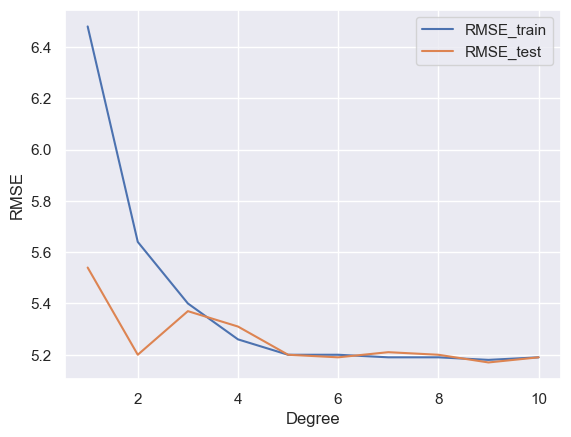

In [226]:
output.set_index('Degree').plot()
plt.ylabel('RMSE')
plt.show()

#### 8.
Based on the above table and chart, the optimal polynomial degree is 9, because the model with degree=9 has the lowest RMSE_test at 5.17.